# Práctica 5: Clasificación Lineal, Perceptron II.

## Realizado por:
- Susana Suárez Mendoza
- Mara Pareja del Pino

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection, preprocessing, datasets
import matplotlib.pyplot as plt

### Ejercicio 1: Implementación del método Perceptron.
1. Cargar el conjunto de datos.

In [2]:
data_csv = pd.read_csv('./iris_pca_2d.csv', sep = ',')
setosa_versicolor = data_csv[data_csv['clase'].isin(['setosa', 'versicolor'])]
df = setosa_versicolor.to_numpy()

### Clase Perceptron.

In [3]:
class Perceptron:

    def __init__(self, max_iter=1000, mezclar=True, eta0=1.0):
        self.max_iter = max_iter
        self.mezclar = mezclar
        self.eta0 = eta0
        self.pesos_ = None
        self.pesos_umbral_ = None
    
    def ajustar(self, X, y):
        self.pesos_ = np.zeros(X.shape[1])
        self.pesos_umbral_ = 0
        max = 0
        while True and max < self.max_iter:
            modificar = False
            if self.mezclar:
                array = np.concatenate((X, y.reshape(-1, 1)), axis=1)
                np.random.shuffle(array)
                X, y= array[:, :-1], array[:, -1]

            for i in range(len(X)):
                f = np.dot(X[i], self.pesos_) + self.pesos_umbral_
                if y[i] == 1 and f < 0:
                    self.pesos_ += self.eta0 * X[i]
                    self.pesos_umbral_ += self.eta0
                    modificar = True
                elif y[i] == 0 and f >= 0:
                    self.pesos_ = self.eta0 * X[i] - self.pesos_
                    self.pesos_umbral_ -= self.eta0
                    modificar = True
                if not modificar:
                    break
            max += 1
    
    def predecir(self, X):
        return np.where(np.dot(X, self.pesos_) + self.pesos_umbral_ >= 0, 1, 0)

### Ejercicio 2: Clasificación con el método Perceptron implementado.

1. Dividir el conjunto anterior en entrenamiento (70%) y test (30).

In [5]:
data_x = df[:, :-1]
data_y = df[:, -1]
encoder = preprocessing.LabelEncoder()
data_y_encode = encoder.fit_transform(data_y)

#Función train_test_split.
x_train, x_test, y_train, y_test = model_selection.train_test_split(data_x, data_y_encode, test_size=0.30, 
                                                                    train_size = 0.70, random_state=42)

array = np.concatenate((x_train, y_train.reshape(-1, 1)), axis=1)
array

array([[-2.612755230908724, 0.0147299391613745, 0],
       [-2.8394621676428504, -0.2279455694938275, 0],
       [0.8068583125004113, 0.1941823147131507, 1],
       [-2.639534715384543, 0.3120399802352826, 0],
       [-0.7045317592446643, -1.0122482275317142, 1],
       [-2.2808596328444923, 0.7413304490629148, 0],
       [0.6602837616969361, -0.3529696657238504, 1],
       [0.927860780944247, 0.46717949444151, 1],
       [-2.8662416521186698, 0.0693644715800803, 0],
       [-2.6235278752244264, 0.8106795141812576, 0],
       [-2.70335978233516, 0.1077060824994115, 0],
       [-2.6369268781057995, -0.1213223478658633, 0],
       [-2.626144973146633, 0.1633849596983285, 0],
       [0.3319344799450577, -0.2126546837811699, 1],
       [-2.562319906196016, 0.3677188574341997, 0],
       [-2.5879863998787687, 0.5135603087492768, 0],
       [-0.1896224723785026, -0.6802867635281334, 1],
       [-2.5066689069258223, -0.1460168804952678, 0],
       [0.2649765081120461, -0.5500364636804753, 1],

2. Entrenar un clasificador lineal utilizando la clase Perceptron implementada.

In [5]:
model = Perceptron()
clf = model.ajustar(x_train, y_train)
w = model.pesos_
b = model.pesos_umbral_
print("Pesos:" , w, "\nIntercept:", b)

Pesos: [1.0878582475595153 -0.5801056843842562] 
Intercept: 1.0


3. Mostrar el gráfico.

In [6]:
#Cálculo de la superficie de decisión.
def decision_surface(x):
    return (-b - w[0]*x) / w[1]

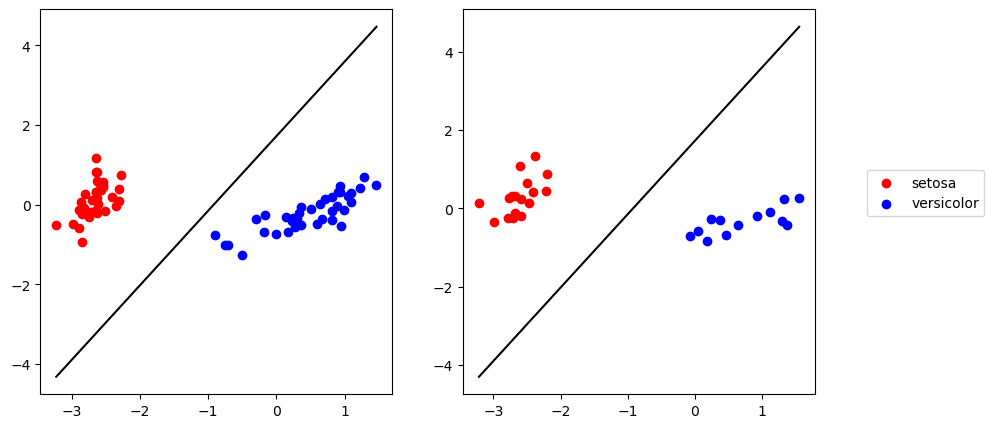

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.scatter(x_train[y_train ==  0, 0], x_train[y_train == 0, 1], c="red")
ax1.scatter(x_train[y_train ==  1, 0], x_train[y_train == 1, 1], c="blue")

x_decision = np.linspace(np.min(x_train[:, 0]), np.max(x_train[:, 0]), 100)
y_decision = decision_surface(x_decision)

ax1.plot(x_decision, y_decision, c='black')

ax2.scatter(x_test[y_test == 0,0], x_test[y_test ==  0, 1], c="red")
ax2.scatter(x_test[y_test ==  1, 0], x_test[y_test ==  1, 1], c="blue")

x_decision = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 100)
y_decision = decision_surface(x_decision)
ax2.plot(x_decision, y_decision, c='black')
plt.legend(labels = ["setosa","versicolor"], loc = "upper right", bbox_to_anchor=(1.5,0.6))
plt.show()


**Setosa y virginica.**

In [8]:
setosa_virginica = data_csv[data_csv['clase'].isin(['setosa', 'virginica'])]
df = setosa_virginica.to_numpy()

data_x = df[:, :-1]
data_y = df[:, -1]
encoder = preprocessing.LabelEncoder()
data_y_encode = encoder.fit_transform(data_y)

#Función train_test_split.
x_train, x_test, y_train, y_test = model_selection.train_test_split(data_x, data_y_encode, test_size=0.30, 
                                                                    train_size = 0.70, random_state=42)

model = Perceptron()
clf = model.ajustar(x_train, y_train)
w = model.pesos_
b = model.pesos_umbral_
print("Pesos:" , w, "\nIntercept:", b)

Pesos: [3.4782784044700357 -0.4116353335556766] 
Intercept: 0.0


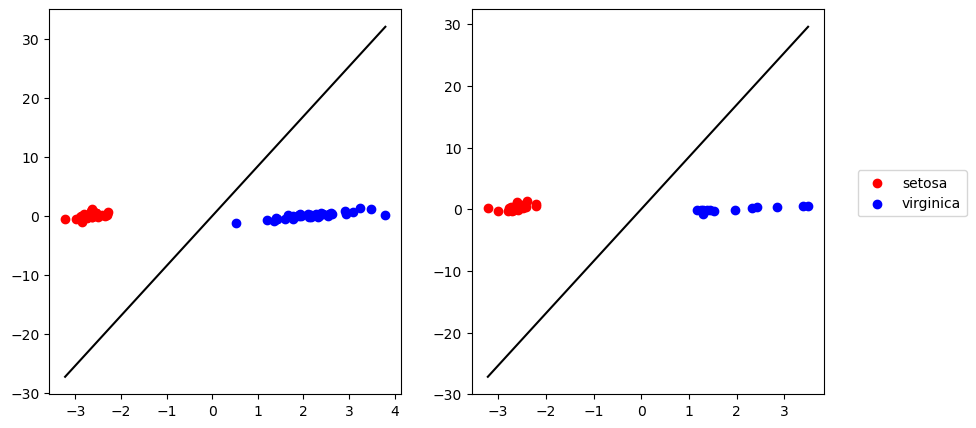

In [9]:
fig, (ax,ax2) = plt.subplots(1,2,figsize = (10,5))
ax.scatter(x_train[y_train ==0, 0], x_train[y_train == 0, 1], c="red")
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c="blue")

x_decision = np.linspace(np.min(x_train[:, 0]), np.max(x_train[:, 0]), 100)
y_decision = decision_surface(x_decision)
ax.plot(x_decision, y_decision, c='black')

ax2.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], c="red")
ax2.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], c="blue")

x_decision = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 100)
y_decision = decision_surface(x_decision)
ax2.plot(x_decision, y_decision, c='black')
plt.legend(labels = ["setosa","virginica"], loc = "upper center",  bbox_to_anchor=(1.25,0.6))

plt.show()

**Versicolor y virginica.**

In [10]:
versicolor_virginica = data_csv[data_csv['clase'].isin(['versicolor', 'virginica'])]
df = versicolor_virginica.to_numpy()

data_x = df[:, :-1]
data_y = df[:, -1]
encoder = preprocessing.LabelEncoder()
data_y_encode = encoder.fit_transform(data_y)

#Función train_test_split.
x_train, x_test, y_train, y_test = model_selection.train_test_split(data_x, data_y_encode, test_size=0.30, 
                                                                    train_size = 0.70, random_state=42)

model = Perceptron()
clf = model.ajustar(x_train, y_train)
w = model.pesos_
b = model.pesos_umbral_
print("Pesos:" , w, "\nIntercept:", b)

Pesos: [0.7502511372674529 -0.780986488246783] 
Intercept: -1.0


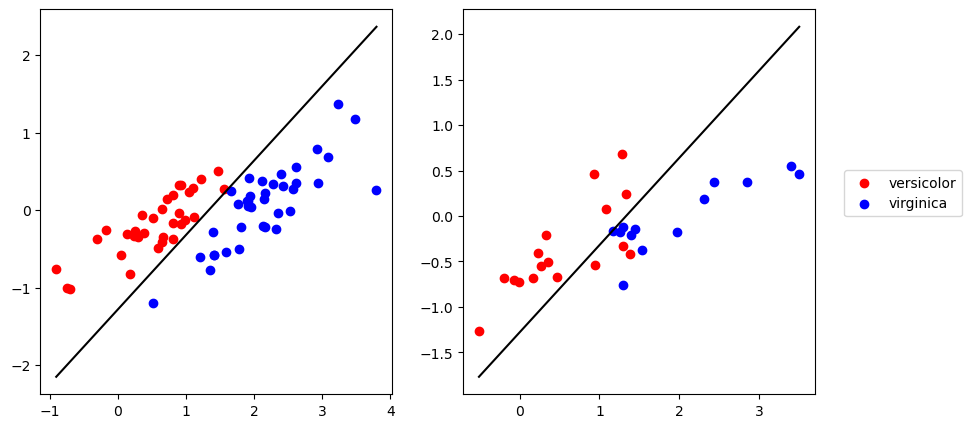

In [11]:
fig, (ax, ax2) = plt.subplots(1,2,figsize = (10,5))
ax.scatter(x_train[y_train ==0, 0], x_train[y_train == 0, 1], c="red")
ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c="blue")

x_decision = np.linspace(np.min(x_train[:, 0]), np.max(x_train[:, 0]), 100)
y_decision = decision_surface(x_decision)
ax.plot(x_decision, y_decision, c='black')
ax2.scatter(x_test[y_test == 0, 0], x_test[y_test == 0, 1], c="red")
ax2.scatter(x_test[y_test == 1, 0], x_test[y_test == 1, 1], c="blue")

x_decision = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 100)
y_decision = decision_surface(x_decision)
ax2.plot(x_decision, y_decision, c='black')
plt.legend(labels = ["versicolor","virginica"], loc = "upper center",  bbox_to_anchor=(1.25,0.6))